In [60]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from blcommon.timer import Timer

plt.style.use('scandic')

In [232]:
def polar_to_cartesian(theta, phi):
    '''
    Convert spherical coordinates to cartesian coordinates.

    Parameters
    ----------
    theta : array_like
        Array of theta values.
    phi : array_like
       Array of phi values.

    Returns
    -------
    x : array_like
        Array of x values.
    y : array_like
        Array of y values.
    z : array_like
        Array of z values.
    '''
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    return x, y, z

def plot_on_sphere(x, y, z, ax=None):
    '''
    Plot points on a sphere. Returns a matplotlib figure.

    Parameters
    ----------
    x : array_like
        Array of x values.
    y : array_like
        Array of y values.
    z : array_like
        Array of z values.

    Returns
    -------
    fig : matplotlib figure
        Figure containing the plot.

    '''

    # Create a sphere
    r = 1
    pi = np.pi
    cos = np.cos
    sin = np.sin
    phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
    x_sphere = r*sin(phi)*cos(theta)
    y_sphere = r*sin(phi)*sin(theta)
    z_sphere = r*cos(phi)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    print(ax.get_proj())

    ax.plot_surface(
        x_sphere, y_sphere, z_sphere,  rstride=1, cstride=1, color='C0', alpha=0.3, linewidth=0)

    ax.scatter(x,y,z,color="k",s=20)

    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])
    ax.set_aspect("equal")
    return fig

def cartesian_to_polar(x, y, z):
    '''
    Convert cartesian coordinates to spherical coordinates.

    Parameters
    ----------
    x : array_like
        Array of x values.
    y : array_like
        Array of y values.
    z : array_like
        Array of z values.

    Returns
    -------
    theta : array_like
        Array of theta values.
    phi : array_like
        Array of phi values.
    '''
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z/r)
    phi = np.arctan2(y,x)
    return theta, phi

def plot_eval(x, y, z, title = None):
    fig = plt.figure(figsize=(7, 7))  

    ax_0 = plt.subplot(2, 2, 1, projection='3d')
    ax_1 = plt.subplot(2, 2, 2, projection=None)
    ax_2 = plt.subplot(2, 2, 3, projection=None)
    ax_3 = plt.subplot(2, 2, 4, projection=None)
    
    # plotting on the sphere
    r = 1
    pi = np.pi
    cos = np.cos
    sin = np.sin
    phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
    x_sphere = r*sin(phi)*cos(theta)
    y_sphere = r*sin(phi)*sin(theta)
    z_sphere = r*cos(phi)

    ax_0.plot_surface(
        x_sphere, y_sphere, z_sphere,  rstride=1, cstride=1, color='C1', alpha=0.3, linewidth=0)

    ax_0.scatter(x,y,z,color="k",s=1)

    ax_0.set_xlim([-1.1,1.1])
    ax_0.set_ylim([-1.1,1.1])
    ax_0.set_zlim([-1.1,1.1])

    ax_0.set_aspect("equal")

    ax_0.set_xlabel('x')
    ax_0.set_ylabel('y')
    ax_0.set_zlabel('z')
    
    # plotting histograms
    nums, bins = np.histogram(x, bins=11)
    bins = (bins[:-1] + bins[1:])/2
    ax_1.bar(bins, nums, width=2/13)
    ax_1.set_ylabel('Number of points')
    ax_1.set_xlabel('x position')
    ax_1.set_xlim([-1,1])


    nums, _ = np.histogram(y, bins=11)
    ax_2.bar(bins, nums, width=2/13)
    ax_2.set_ylabel('Number of points')
    ax_2.set_xlabel('y position')
    ax_2.set_xlim([-1,1])


    nums, _ = np.histogram(z, bins=11)
    # print(bins)
    ax_3.bar(bins, nums, width=2/13)
    ax_3.set_ylabel('Number of points')
    ax_3.set_xlabel('z position')
    ax_3.set_xlim([-1,1])

    if title is not None:
        fig.suptitle(title)

    fig.tight_layout()
    return fig
    
    

# Generating random points on sphere

## What is uniform and how to visualise it?

Lets say I would use the spherical coordinates $\phi \in \left< 0, 2\pi\right>,\, \theta\in\left<0, \pi\right>$. And lets say I would generate one point every 15º of anfle one point. What does this lead to? 

Around the 'poles' ($\theta = 0,\,\theta = 2\pi $) there would be several 'circles' of points. On the other hand if we take point on the 'equator'($\theta = \pi$), in the same suroundings of this point there will be less points. However there should not really matter on the orientation of the sphere, if we want the points to be uniformly distributed. Wherever we take a point, there should be the same number of points in the same surroundings.

**Outcome:**

The distribuion of points as well as the visualisation method should be independent of the orientation of the sphere.

[[  0.98974332   0.57142857   0.          -0.78058595]
 [ -0.28571429   0.49487166   0.74230749  -0.47573243]
 [  0.           0.           0.         -10.        ]
 [ -0.49487166   0.85714286  -0.42857143  10.03315012]]


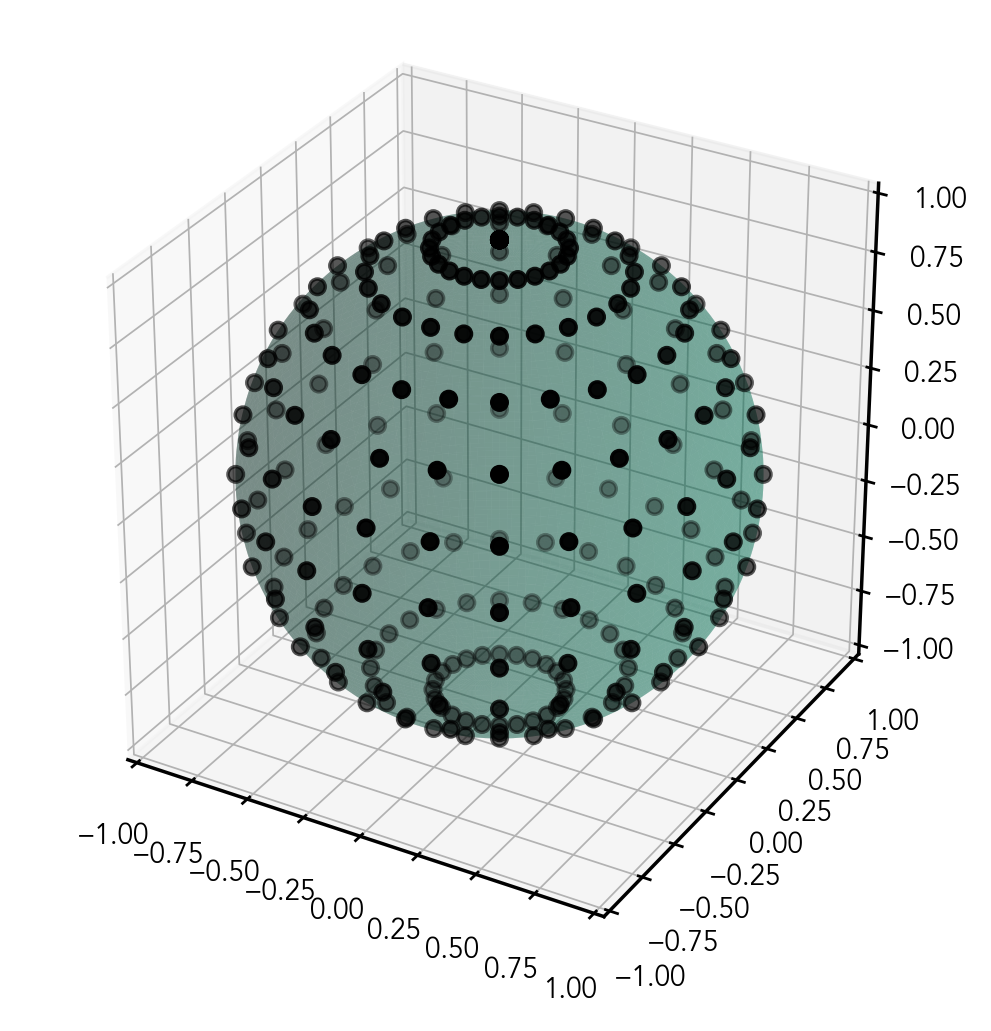

In [229]:
theta = np.arange(0, np.pi, 15/180*np.pi)
phi = np.arange(0, 2*np.pi, 15/180*np.pi)
theta, phi = np.meshgrid(theta, phi)

# plotting 
x, y, z = polar_to_cartesian(theta, phi)
fig = plot_on_sphere(x, y, z)
plt.show()

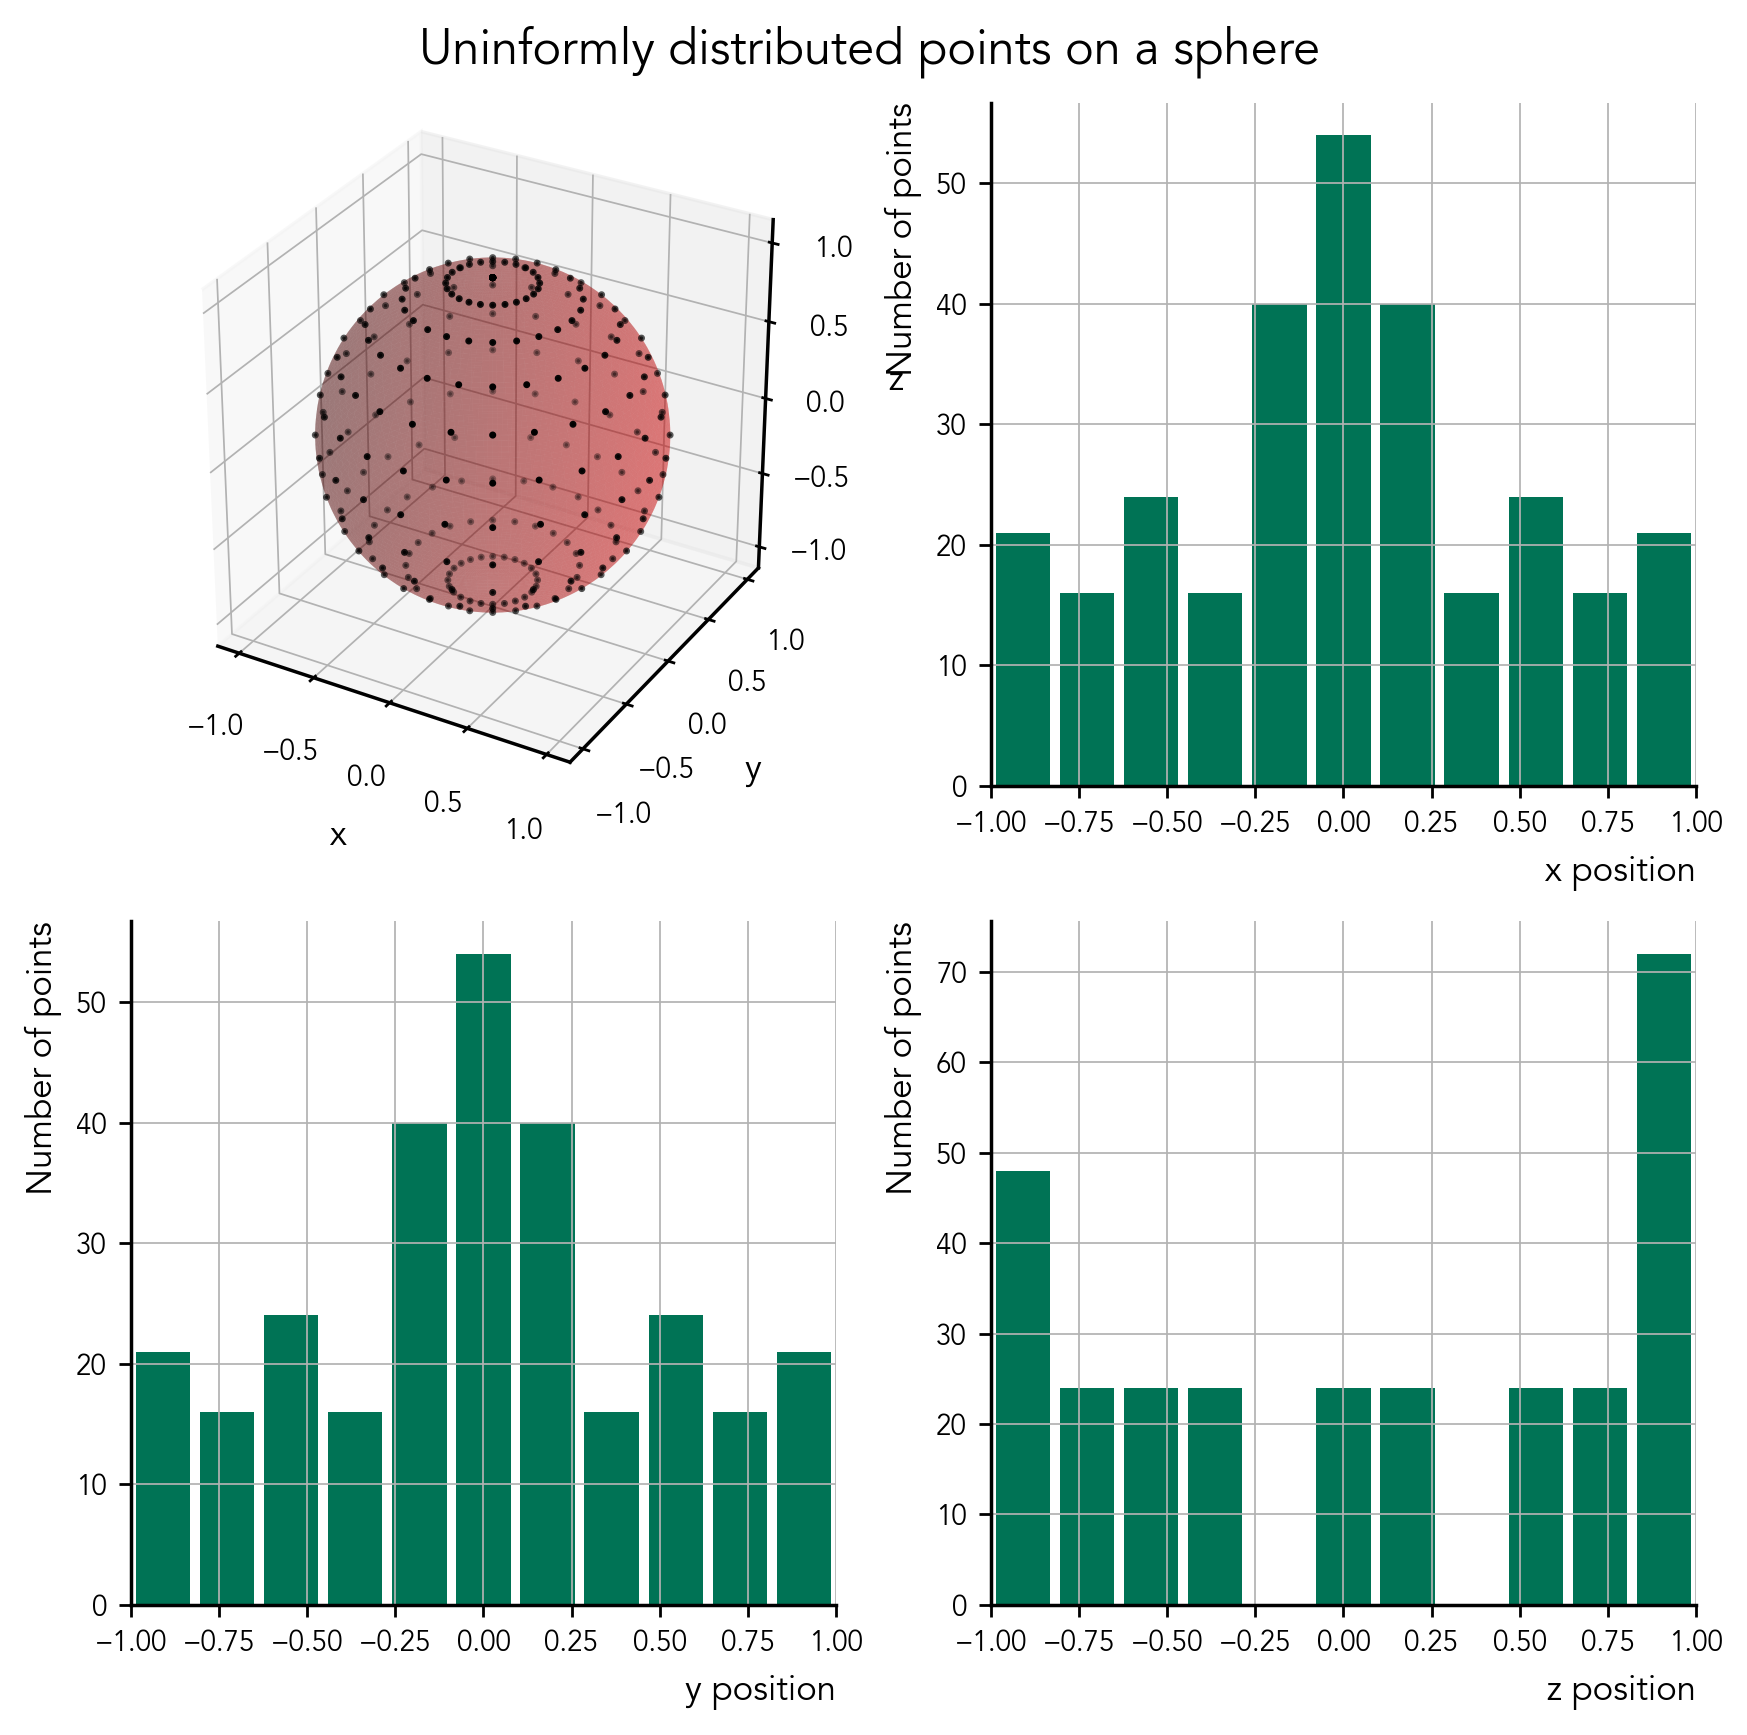

In [233]:
theta = np.arange(0, np.pi, 15/180*np.pi)
phi = np.arange(0, 2*np.pi, 15/180*np.pi)
theta, phi = np.meshgrid(theta, phi)

# plotting 
x, y, z = polar_to_cartesian(theta, phi)
fig = plot_eval(x, y, z, title='Uninformly distributed points on a sphere')

In [5]:
@Timer("generate_1")
def generate_1(no_of_points):
    '''
    Generate points on a sphere using the method described in the problem statement.

    Parameters
    ----------
    no_of_points : int
        Number of points to generate.

    Returns
    -------
    x : array_like
        Array of x values.
    y : array_like
        Array of y values.
    z : array_like
        Array of z values.
    '''
    #generates n random 3D vectors between -1 and 1
    x = np.random.uniform(-1,1,no_of_points)
    y = np.random.uniform(-1,1,no_of_points)
    z = np.random.uniform(-1,1,no_of_points)
    r = np.array([x,y,z])
    #normalizes the vectors
    r_norm = np.linalg.norm(r,axis=0)
    r_norm = np.tile(r_norm,(3,1))
    r = r/r_norm
    return r[0],r[1],r[2]


generate_1 > Elapsed time: 0.0678 seconds


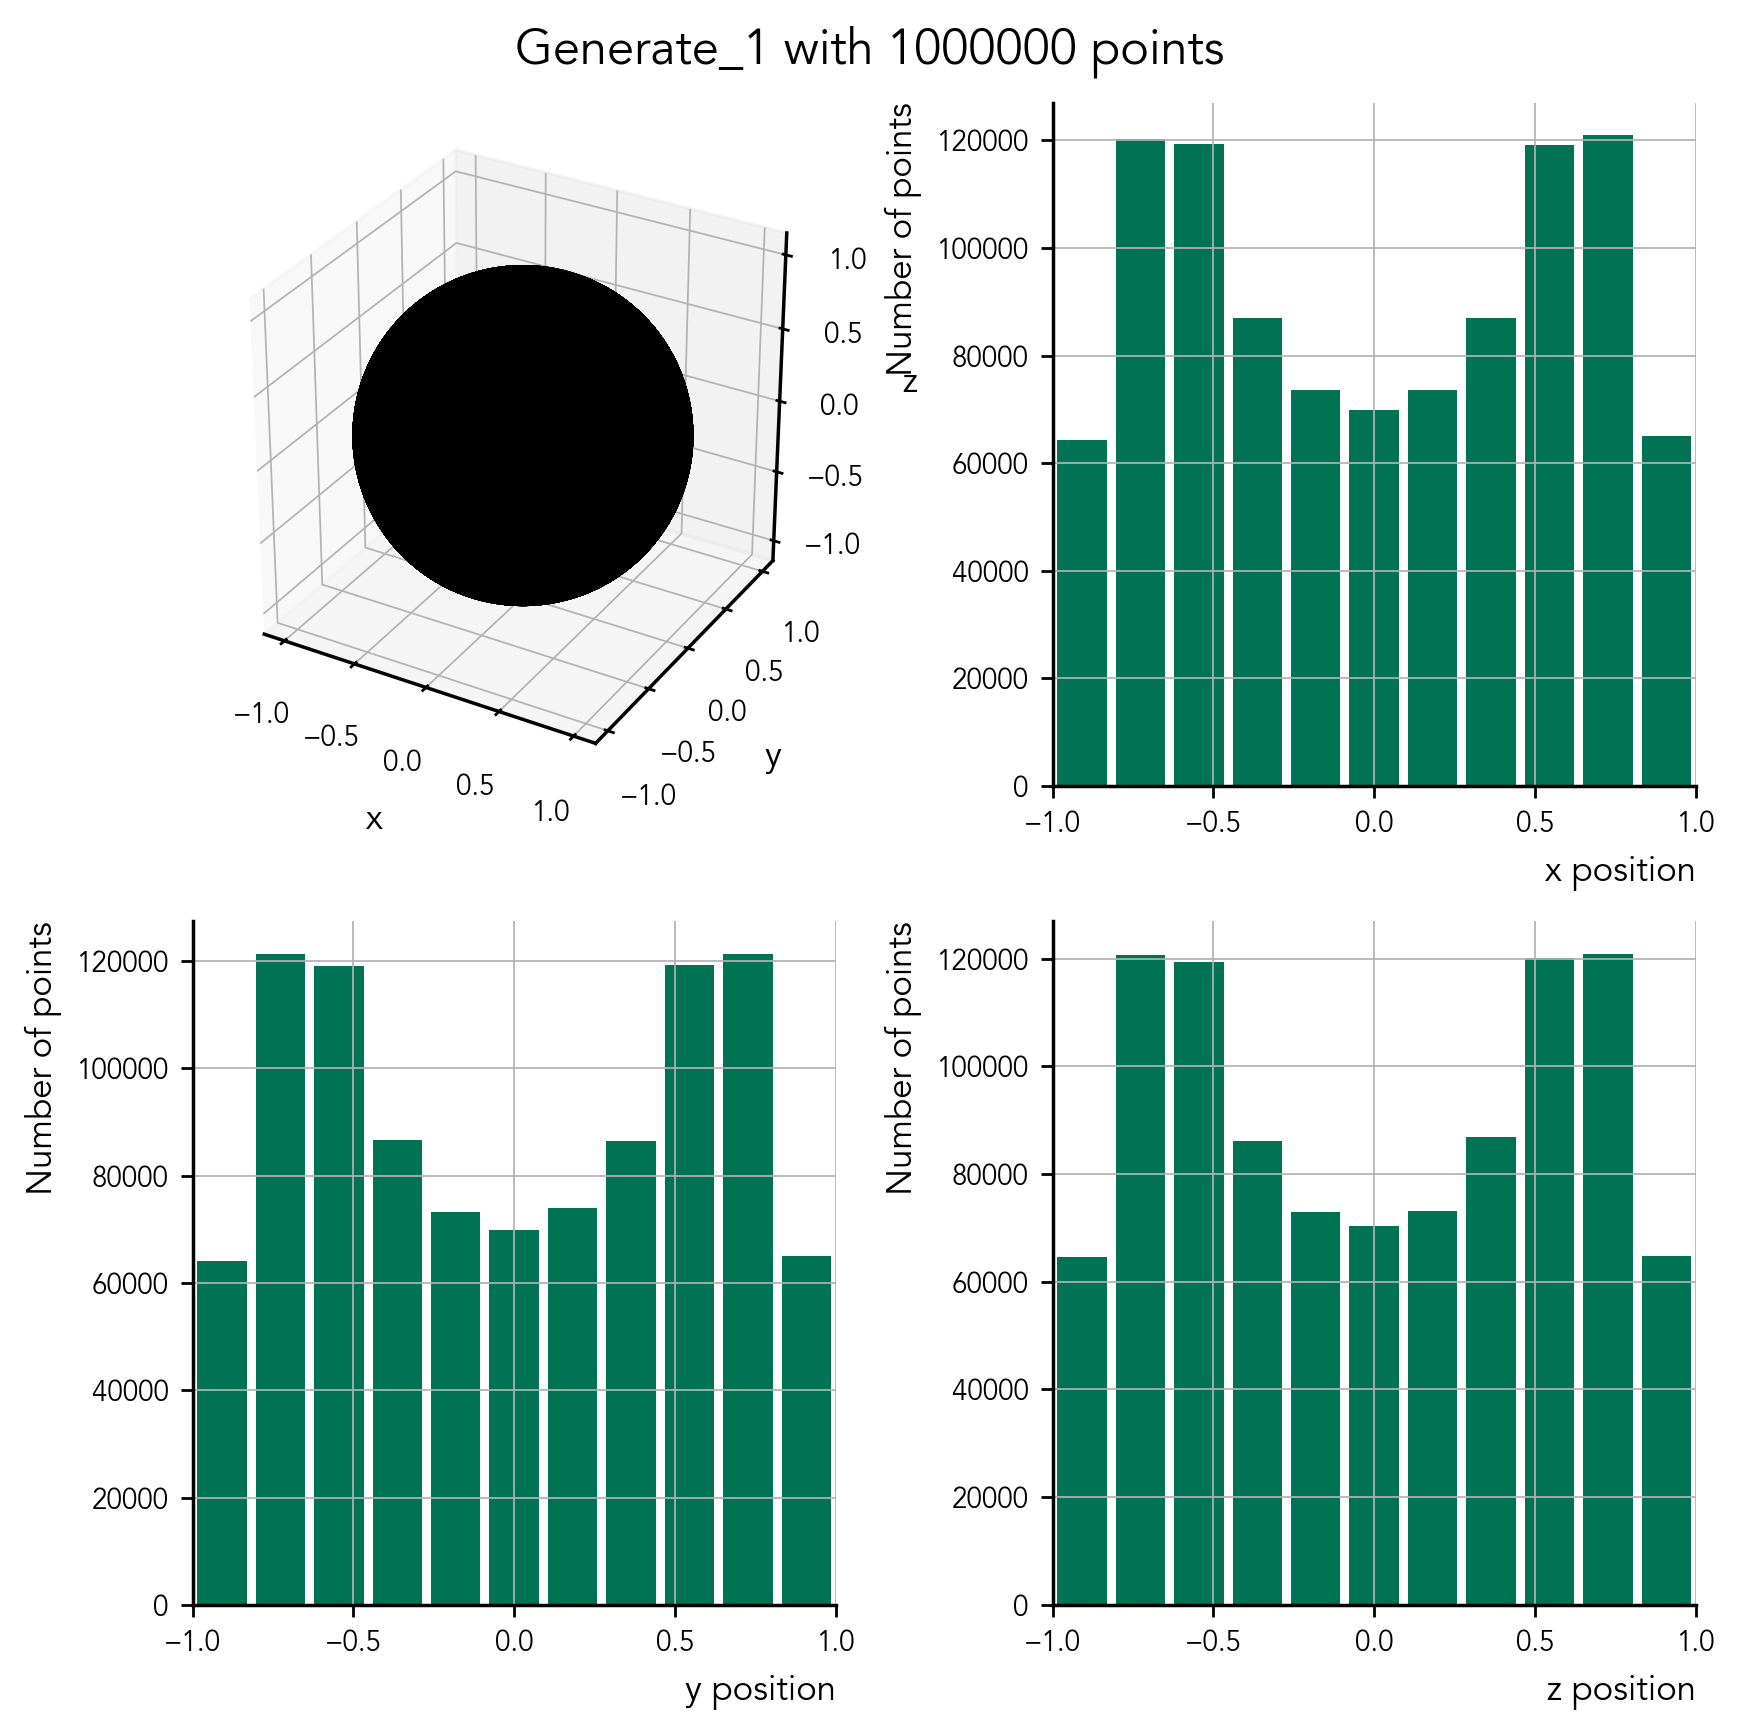

In [241]:
# trying the function
x,y,z = generate_1(1000000)
fig = plot_eval(x, y, z, title=f'Generate_1 with {x.shape[0]} points')
plt.show()

In [226]:
@Timer("generate_2")
def generate_2(no_of_points):
    ''' 
    Choose 3 random numbers between −1 and 1 and interpret them as a vector,⃗ v. Discard all vectors with |⃗v| > 1 and normalize the rest, as above. Repeat until you have n vectors.
    '''
    x = np.random.uniform(-1,1,int(no_of_points*np.sqrt(5)))
    y = np.random.uniform(-1,1,int(no_of_points*np.sqrt(5)))
    z = np.random.uniform(-1,1,int(no_of_points*np.sqrt(5)))
    r = np.array([x,y,z])
    # print(r.shape)
    r_norm = np.linalg.norm(r,axis=0)
    # print(r_norm.shape)
    r_norm = np.tile(r_norm,(3,1))
    # print(r_norm.shape)
    r = r[r_norm<=1]
    # print(r.shape)
    r_norm = r_norm[r_norm<=1]
    r = r/r_norm
    #reshaping the array
    r = r.reshape(3,-1)
    r = r[:,:no_of_points]
    return r[0],r[1],r[2]


generate_2 > Elapsed time: 0.1844 seconds


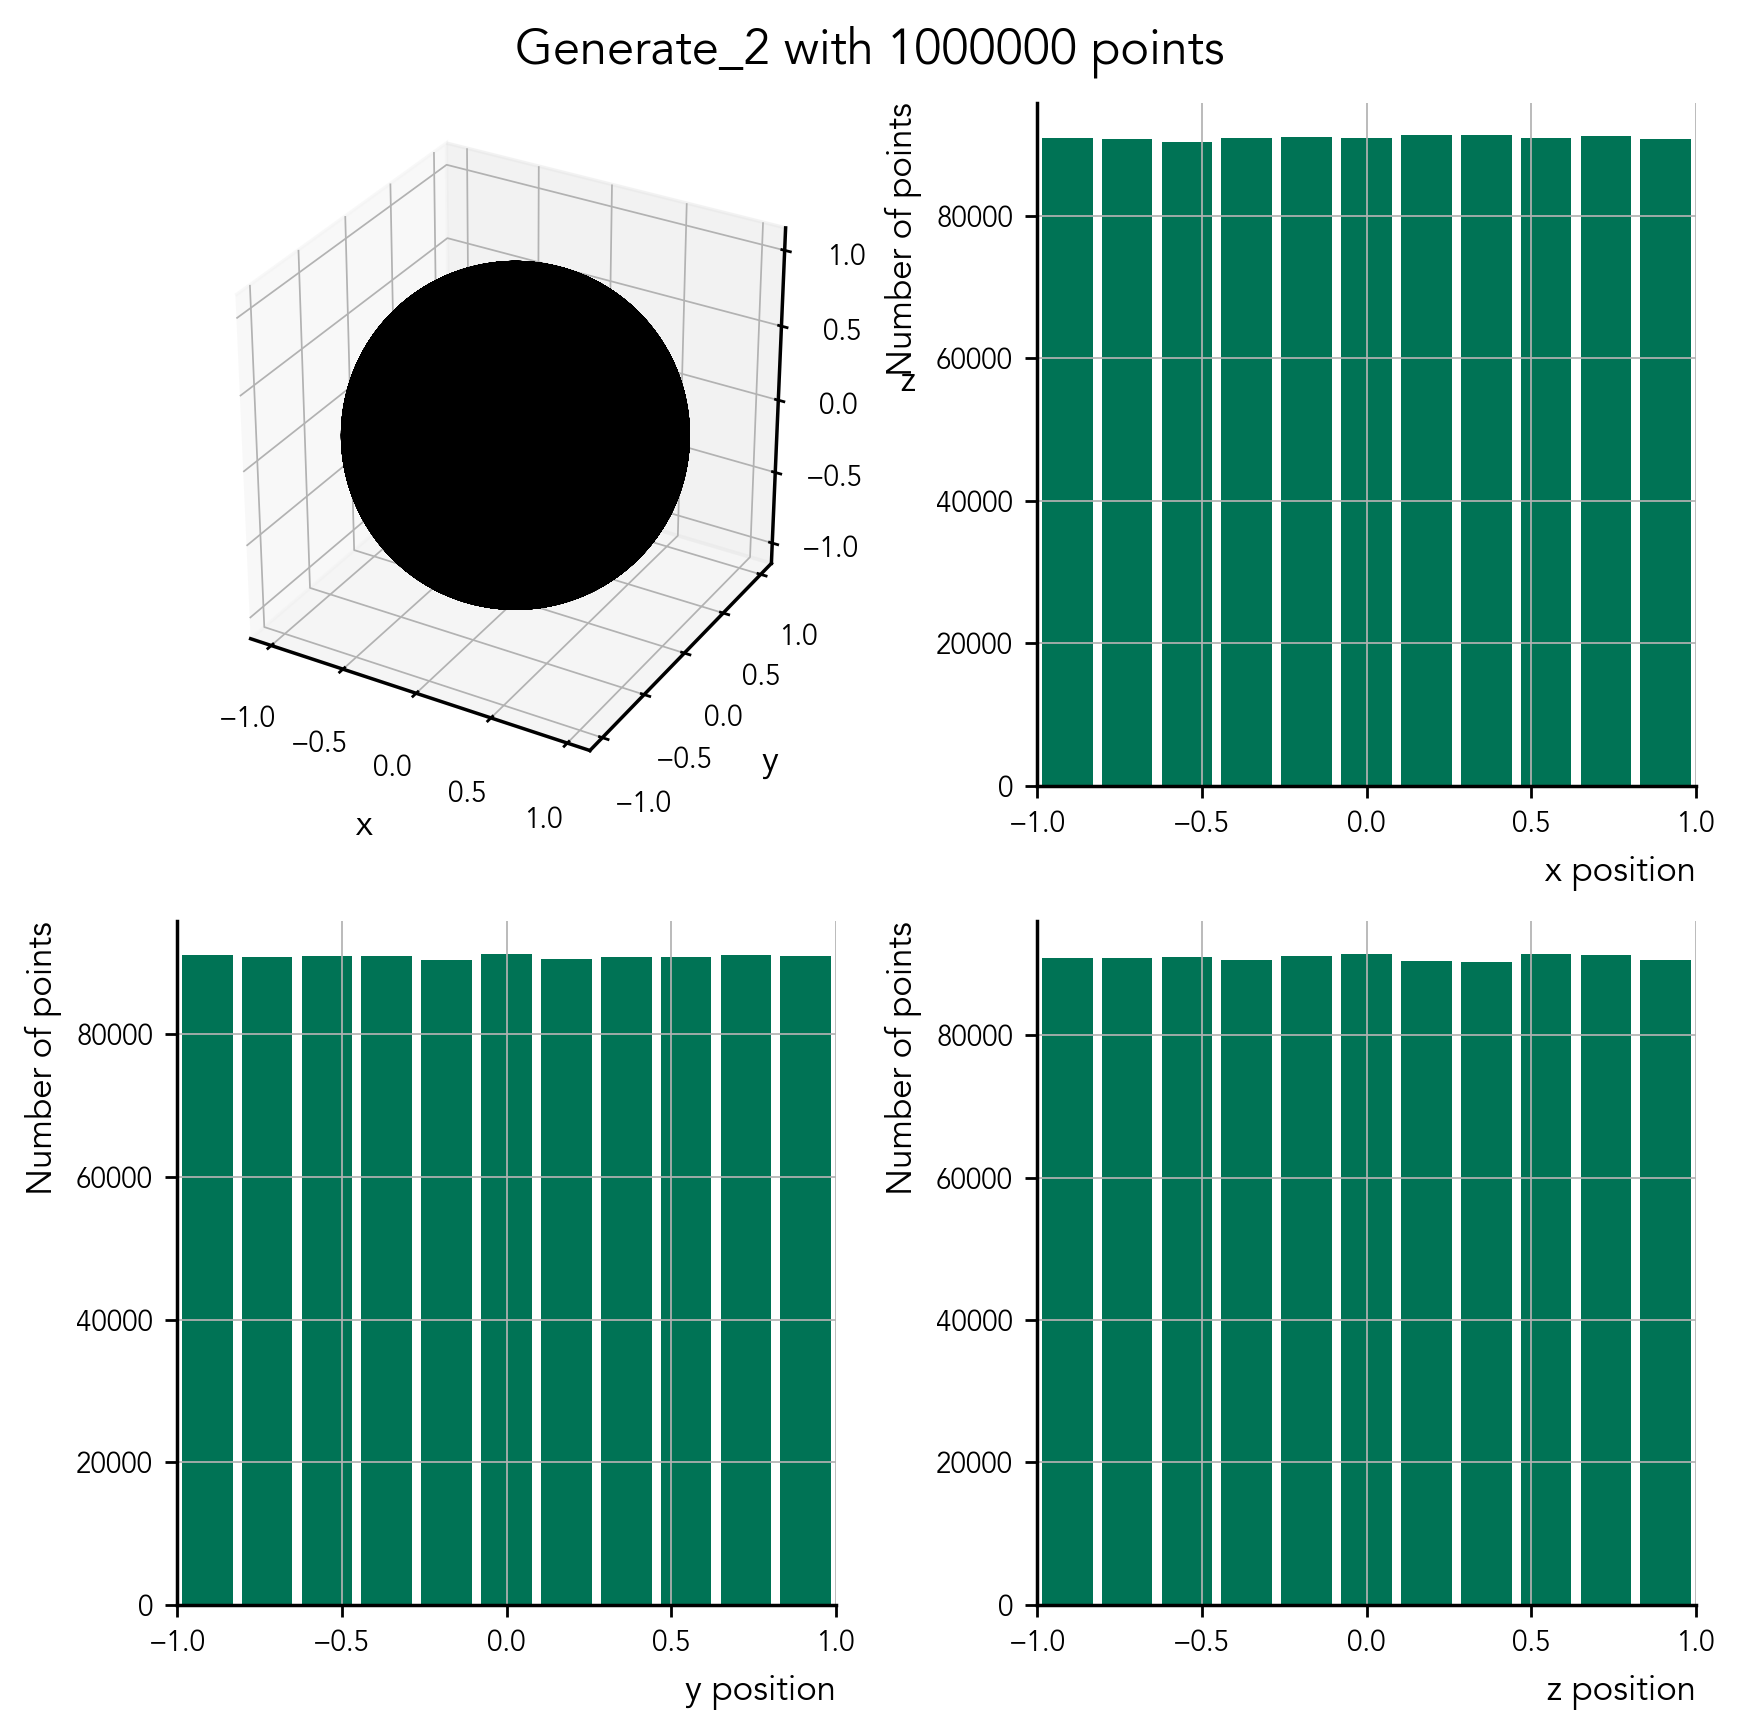

In [242]:
x,y,z = generate_2(1000000)
fig = plot_eval(x, y, z, title=f'Generate_2 with {x.shape[0]} points')
plt.show()

In [216]:
@Timer("generate_3")
def generate_3(no_of_points):
    '''
    Choose 2 random numbers φ ∈ [0, 2π) and ϑ ∈ [0, π] and interpret (ϑ , φ ) as the spherical
    coordinates of the vector.
    '''
    theta = np.random.uniform(0,np.pi,no_of_points)
    phi = np.random.uniform(0,2*np.pi,no_of_points)
    x,y,z = polar_to_cartesian(theta,phi)
    return x,y,z
    

generate_3 > Elapsed time: 0.0775 seconds


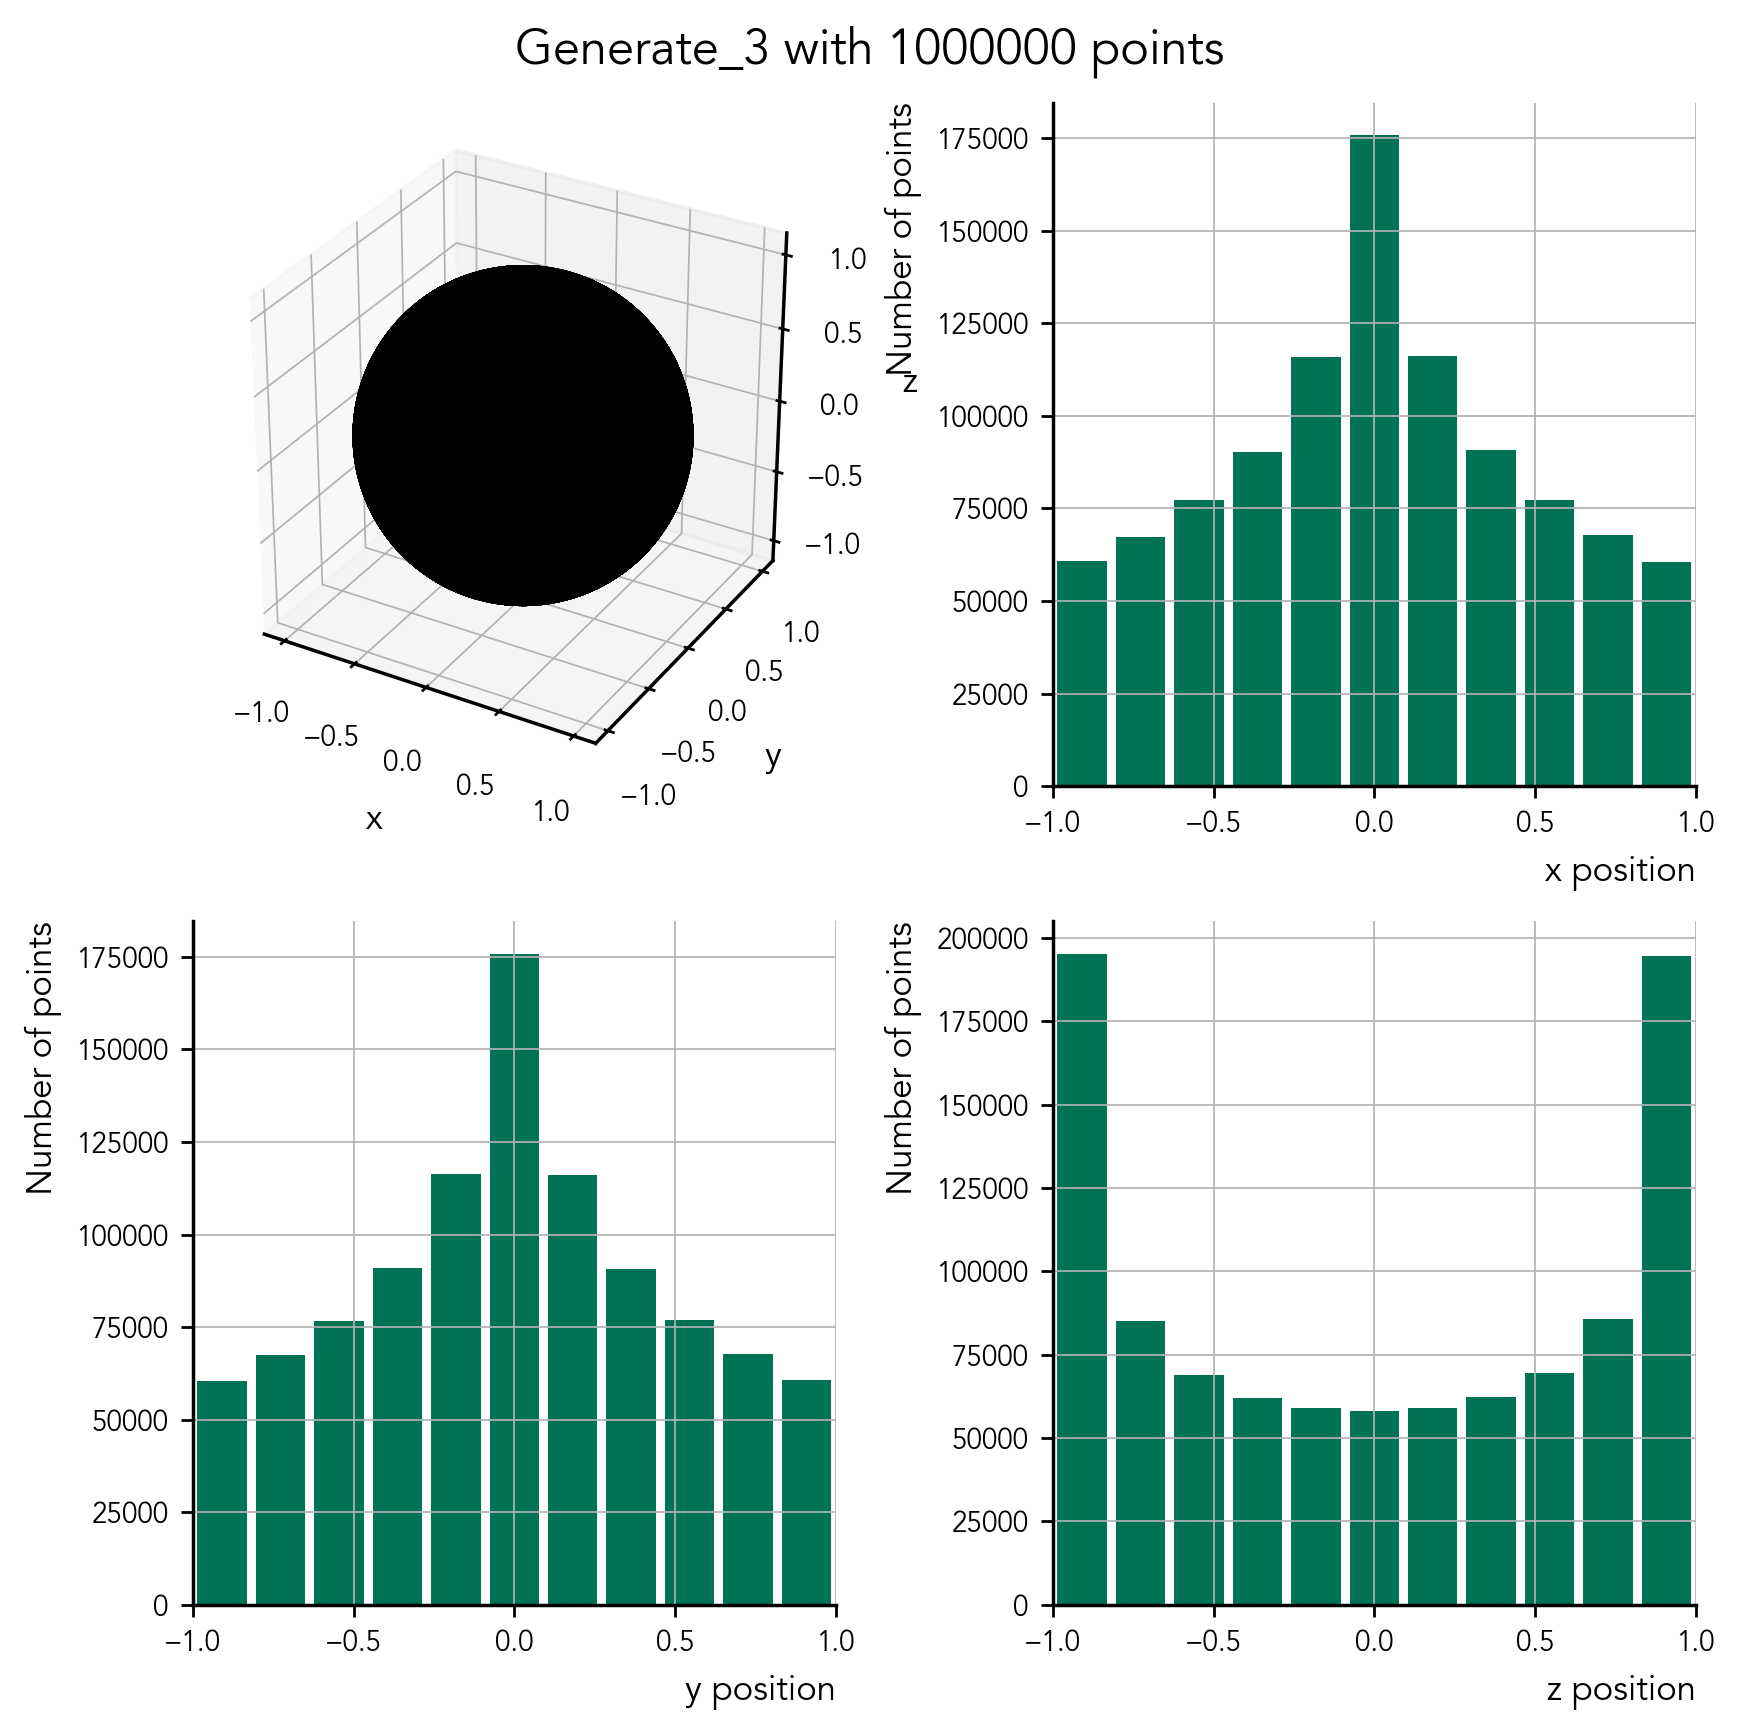

In [243]:
x,y,z = generate_3(1000000)
fig = plot_eval(x, y, z, title=f'Generate_3 with {x.shape[0]} points')
plt.show()

Text(0, 1, '$\\phi$')

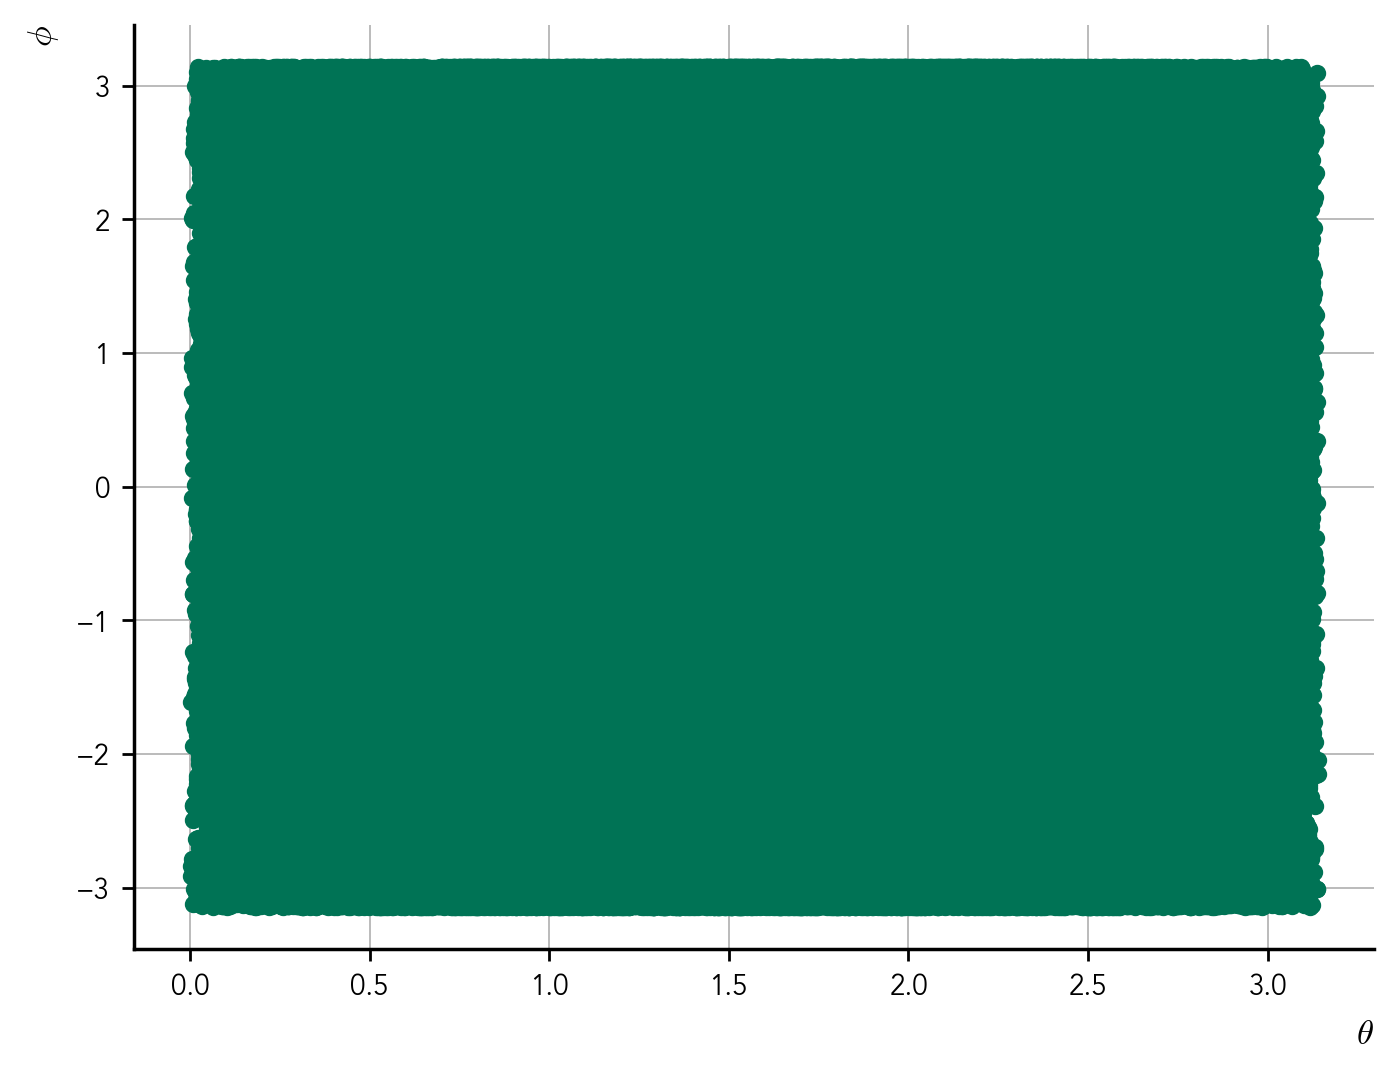

In [245]:
plt.plot(cartesian_to_polar(x,y,z)[0],cartesian_to_polar(x,y,z)[1],'o')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\phi$')

idea s kulovym vrchlikem !!

In [237]:
@Timer("generate_4")
def generate_4(no_of_points):
    '''Choose 2 random numbers φ ∈ [0, 2π) and cos(ϑ ) ∈ [−1, 1] and interpret (ϑ , φ ) as the
    spherical coordinates of the vector.
    '''
    theta = np.arccos(np.random.uniform(-1,1,no_of_points))
    phi = np.random.uniform(0,2*np.pi,no_of_points)
    x,y,z = polar_to_cartesian(theta,phi)
    return x,y,z

generate_4 > Elapsed time: 0.0896 seconds


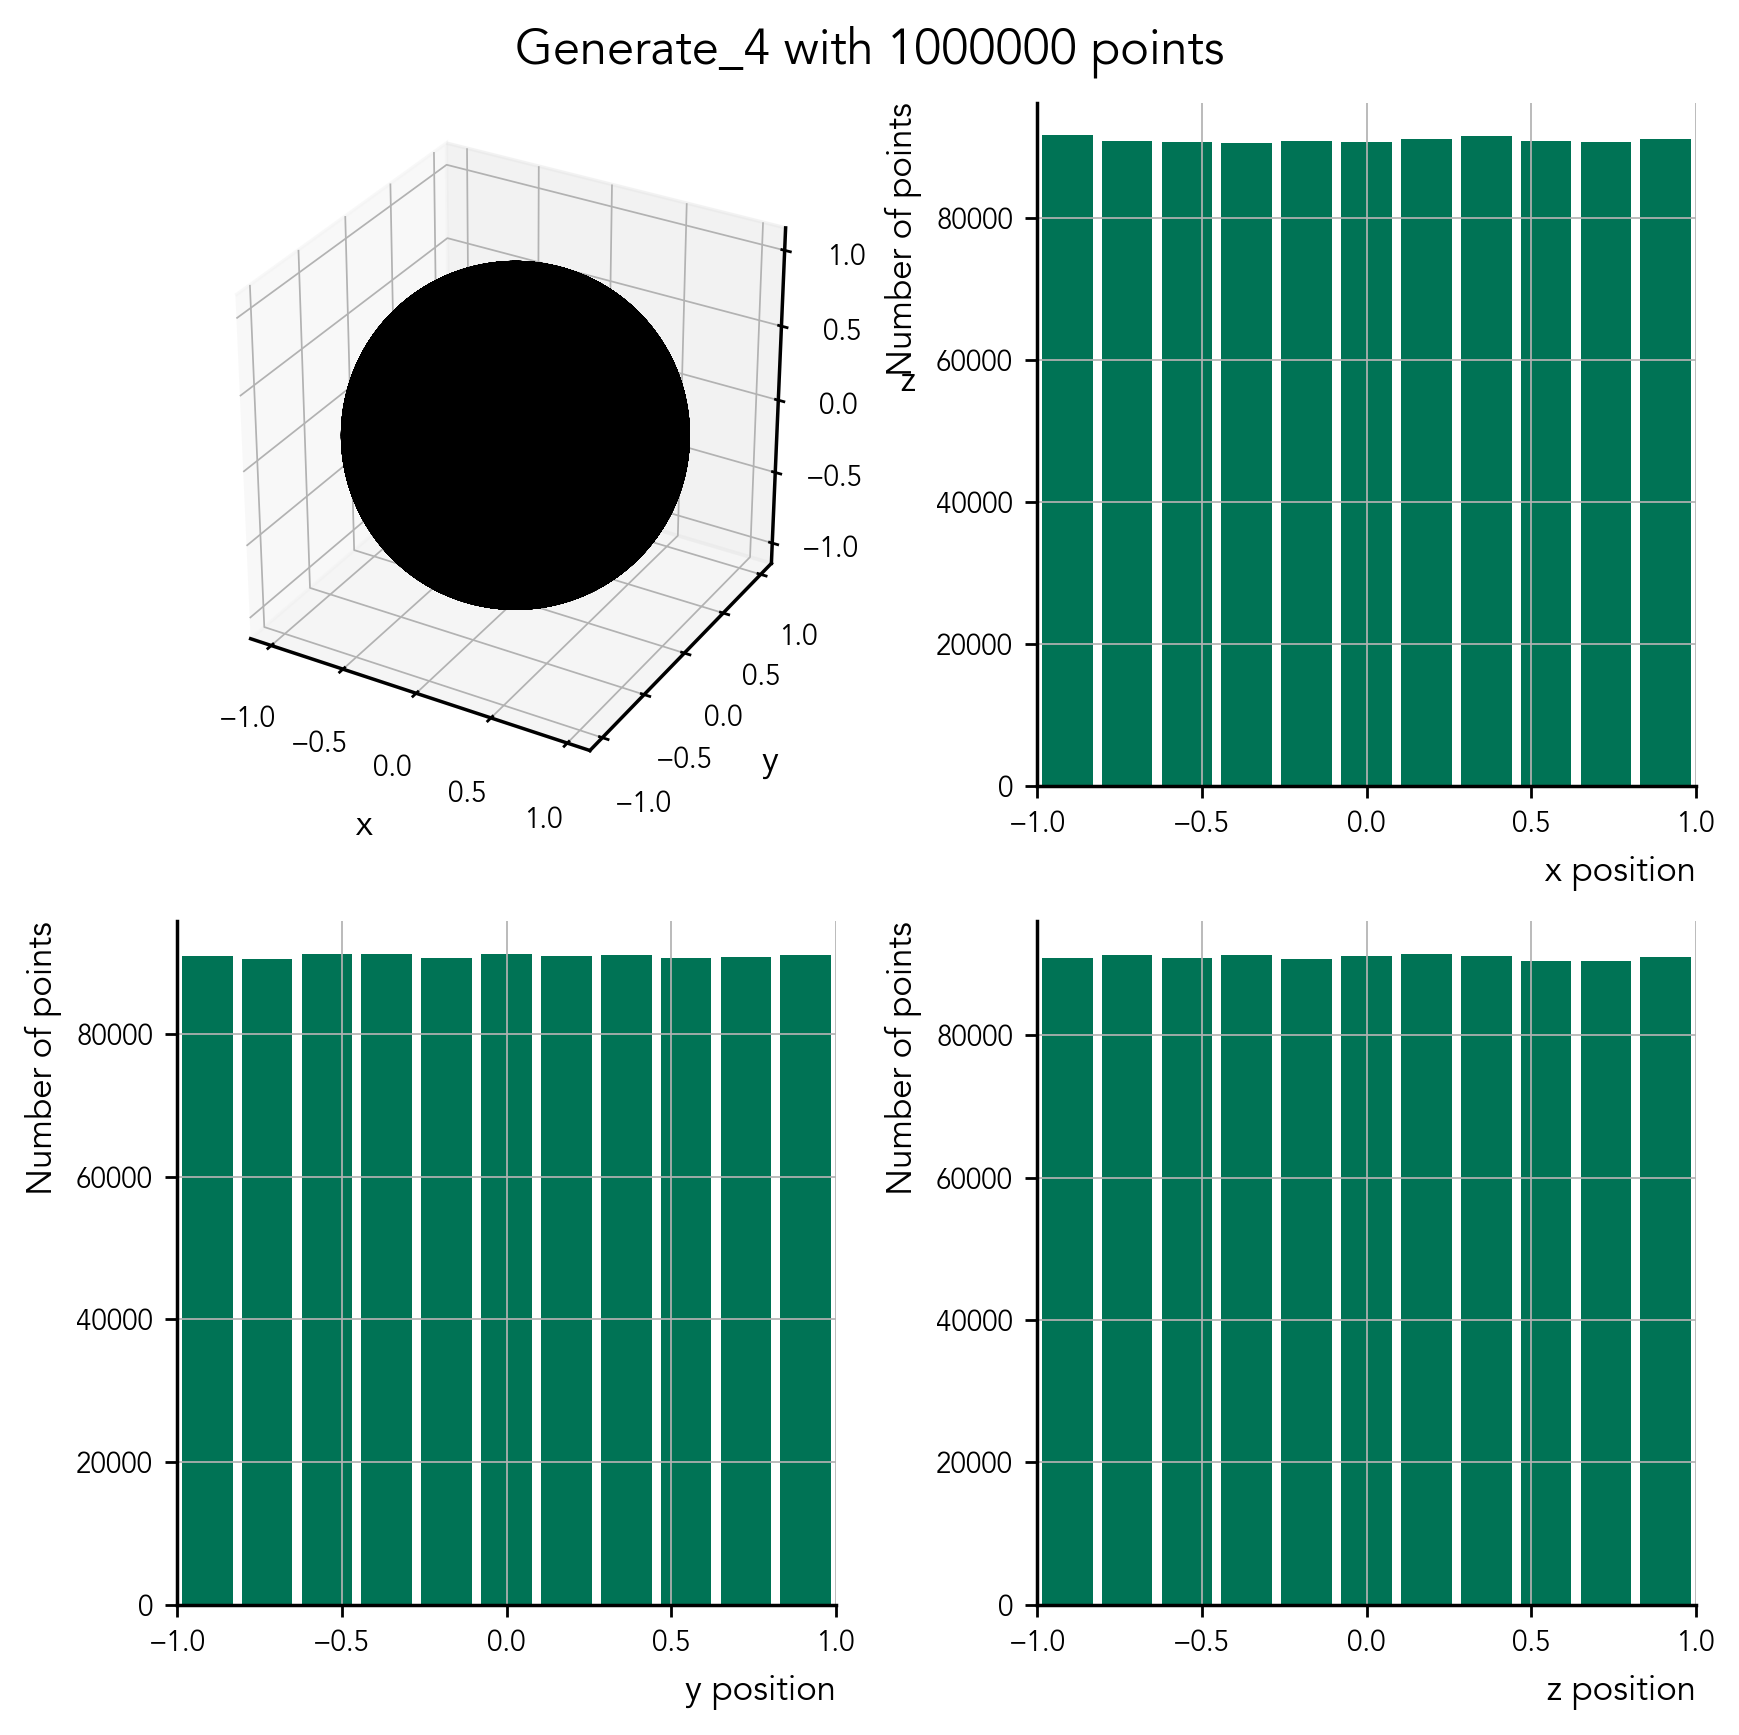

In [244]:
x,y,z = generate_4(1000000)
fig = plot_eval(x, y, z, title=f'Generate_4 with {x.shape[0]} points')
plt.show()


In [246]:
@Timer("generate_5")
def generate_5(no_of_points):
    v = np.random.uniform(-1,1,(4, int(no_of_points*3.5)))
    norms = np.linalg.norm(v, axis=0)
    v = v[:, norms<=1]
    norms = norms[norms<=1]

    # take only the first no_of_points
    v = v[:,:no_of_points]
    norms = norms[:no_of_points]

    x = 2*(v[1]*v[3] + v[0]*v[2])/norms
    y = 2*(v[2]*v[3] - v[0]*v[1])/norms
    z = (v[0]**2 + v[3]**2 - v[1]**2 - v[2]**2)/norms
    return x,y,z


generate_5 > Elapsed time: 0.2663 seconds


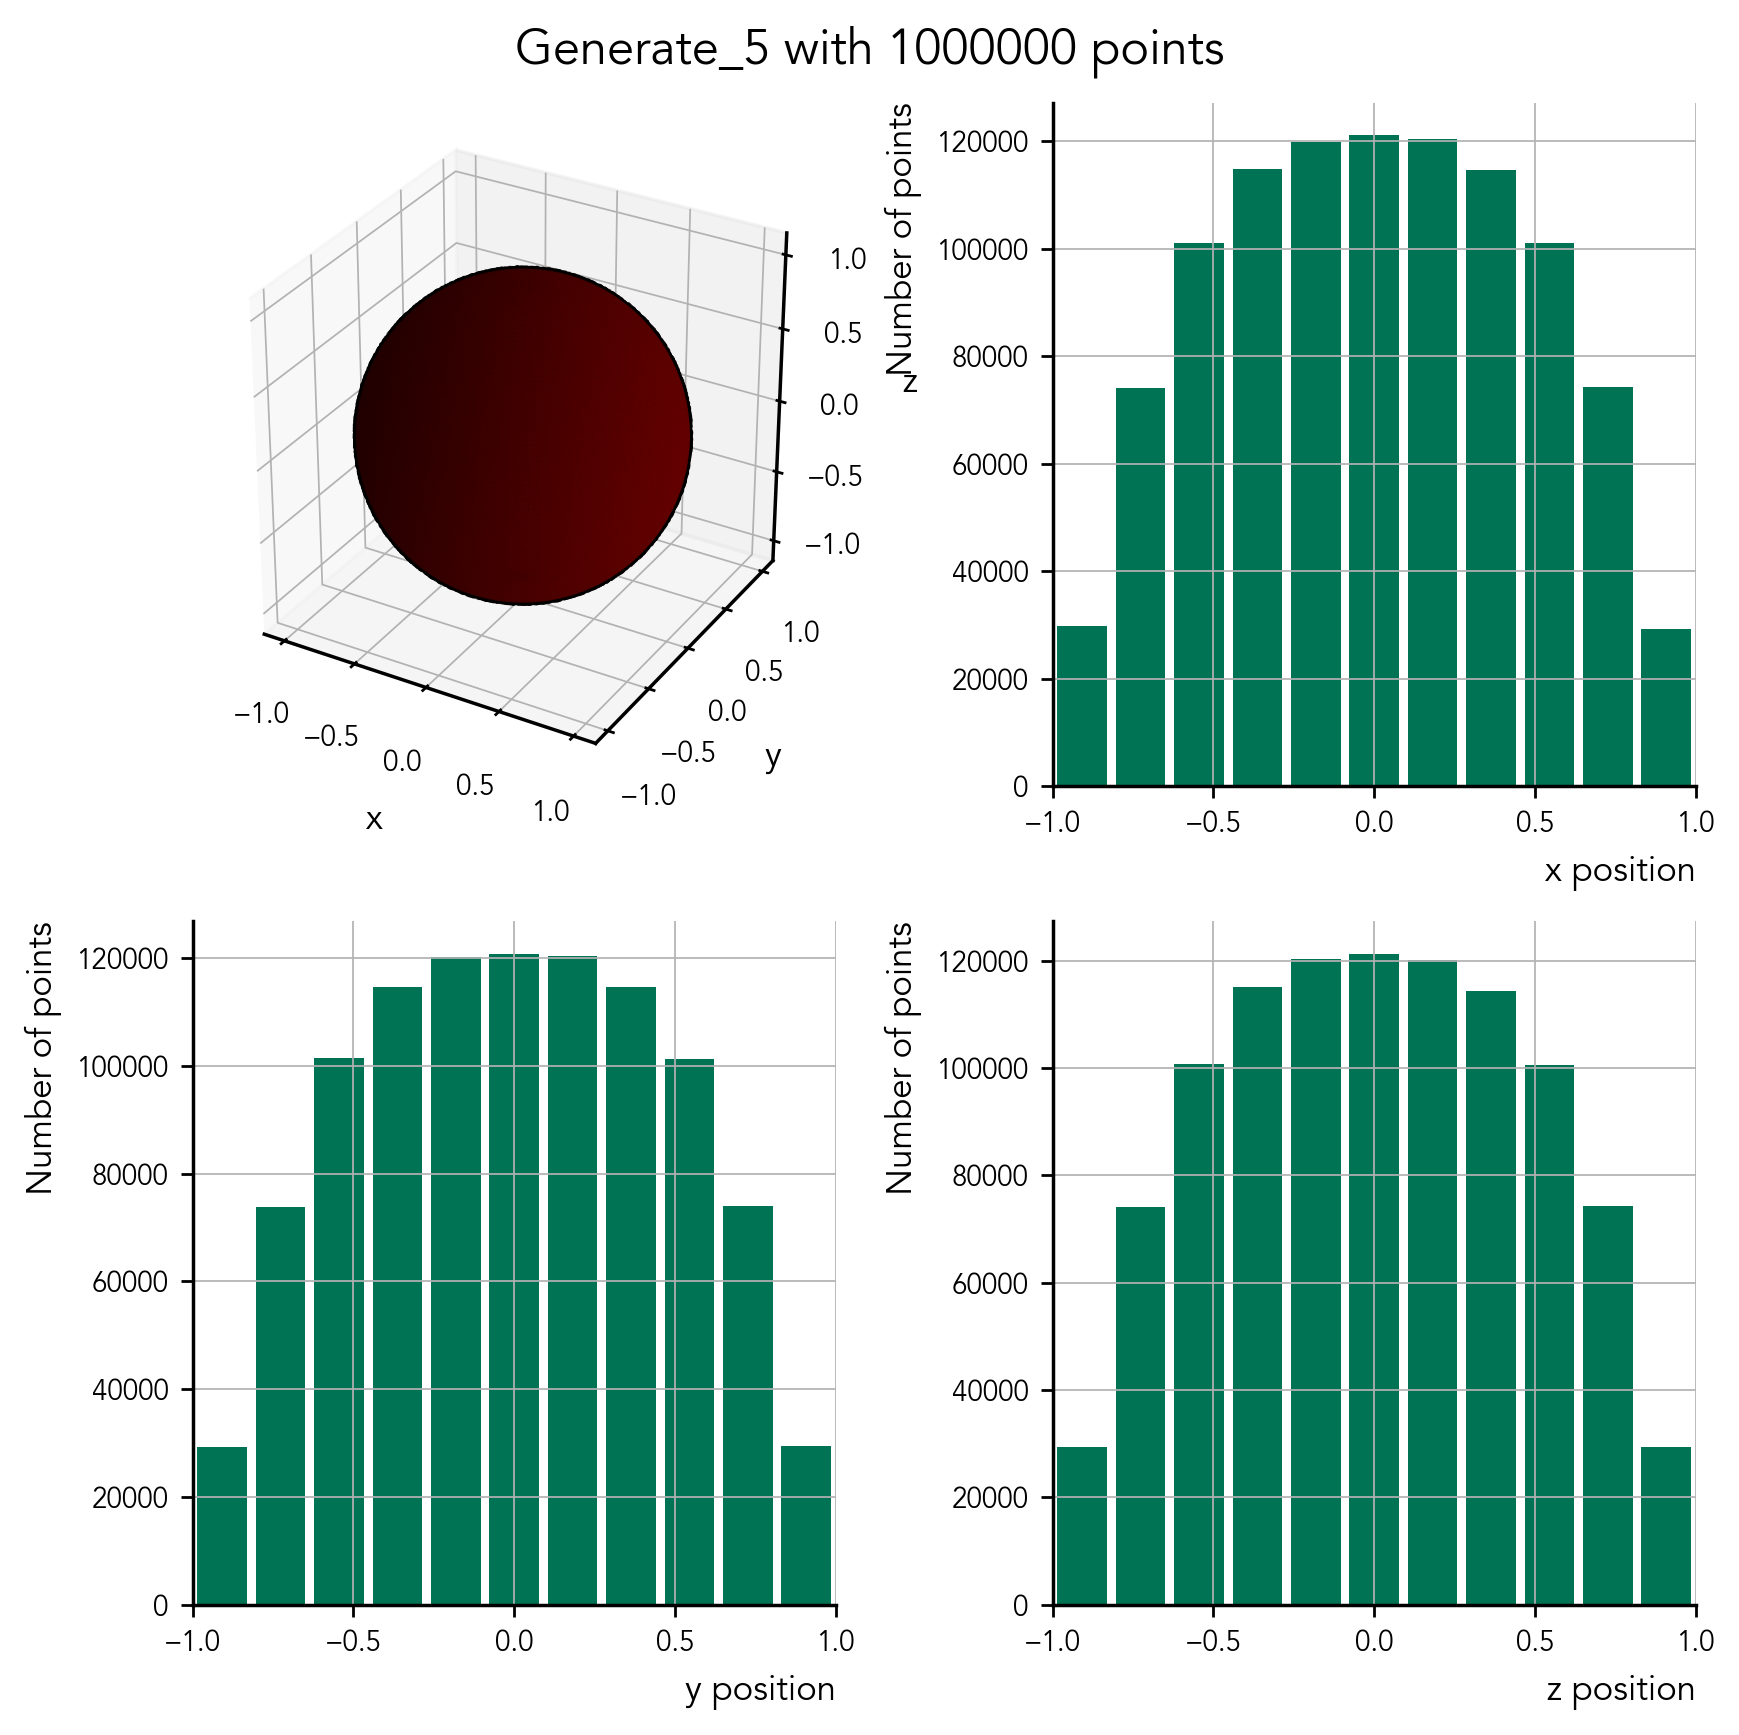

In [247]:
x,y,z = generate_5(1000000)
fig = plot_eval(x, y, z, title=f'Generate_5 with {x.shape[0]} points')
plt.show()

## summary of speed and uniformity 

| method | speed <br> (sec/1e6 points) | uniformity |
| --- | ---: | --- |
| 1 | 0.0678 | more around +/- 0.5 in every axis <br> _bcs we are transforming cube into the sphere, see the figure_  |
| 2 | 0.1844 | perfectly uniform |
| 3 | 0.0775 | center of x and y, edges of z |
| 4 | 0.0896 | uniform |
| 5 | 0.2663 | more to the center of each axes |

![IMG_1.jpeg](IMG_1.jpeg)

# answers to the questions

> b. Which methods work? Which methods do not—and why?

It seems that the method 2 is the best. It is perfectly uniform and it is not that slow. The method 5 is the worst. It is not uniform and it is the slowest. The method 1 is not uniform, but it is the fastest. The method 3 is uniform, but it is not that fast. The method 4 is uniform and it is faster than the method 3.

> c. Between methods iii and iv, argue which of these methods is correct.

Methods 2 and 4 as they generate uniform samples.

>  d. Which method would you choose to be as computationally efficient as possible?

Method 4 as it is fast and uniform.